# Example of feature extraction

In [ ]:
import torch
import torch.nn as nn
from models import MLP
import torchvision.transforms.v2 as F
from PIL import Image
import os
import json
import matplotlib.pyplot as plt

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

#enable GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# 1. Load Configuration
with open("configs/config_best_so_far.json", 'r') as f:
    config = json.load(f)

cpu


In [20]:
# 2. Initialize Model
# Input dimensions have to be exactly like in main.py
C, H, W = 3, 224, 224
num_classes = 11
hidden_layers = config["model_params"]["hidden_layers"]

model = MLP(input_d=C*H*W, output_d=num_classes, hidden_layers=hidden_layers)
# Load weights if you have trained them (optional for demo)
if os.path.exists("experiments/layer_depth_study/L4_Pyramid/L4_Pyramid.pth"):
    # model.load_state_dict(torch.load("experiments/layer_depth_study/L4_Pyramid/L4_Pyramid.pth"))
    model.load_state_dict(
        torch.load(
            "experiments/layer_depth_study/L4_Pyramid/L4_Pyramid.pth", 
            map_location=torch.device('cpu')
        )
    )
    print("Loaded weights from L4_Pyramid.pth")

model.eval()

/tmp/ipykernel_185550/4019761296.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(


Loaded weights from L4_Pyramid.pth


MLP(
  (layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=150528, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.0, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=1024, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.0, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=512, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
      (3): Dropout(p=0.0, inplace=False)
    )
    (3): Sequential(
      (0): Linear(in_features=256, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

Processing image: /ghome/group04/mcv/datasets/C3/2526/places_reduced/train/industrial and construction/junkyard_00004500.jpg


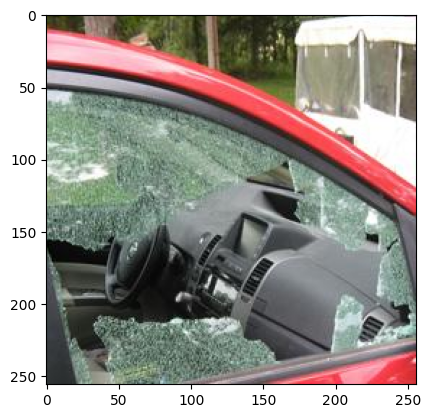

In [21]:
# 3. Load and Preprocess an Image
# Pick a random image from the train set
dataset_path = os.path.expanduser(config["dataset_path"])
image_path = "/ghome/group04/mcv/datasets/C3/2526/places_reduced/train/industrial and construction/junkyard_00004500.jpg"

print(f"Processing image: {image_path}")

# Same transforms as training
transformation = F.Compose([
    F.ToImage(),
    F.ToDtype(torch.float32, scale=True),
    F.Resize(size=(224, 224)),
])

img = Image.open(image_path).convert('RGB')
img_tensor = transformation(img)
img_tensor = img_tensor.unsqueeze(0) # Add batch dimension -> (1, 3, 224, 224)

# show the image
plt.imshow(img)
plt.show()

In [26]:
# 4. Extract Features
# Get features from the first hidden layer (index 0)
features_layer0 = model.get_features(img_tensor, layer_index=3)
print(f"\nFeature extraction from Hidden Layer 0 ({hidden_layers[0]} units):")
print(f"Shape: {features_layer0.shape}") # Should be (1, 300)
print(f"First 100 values: {features_layer0[0][:100].detach().numpy()}")
#chech that all the values are not equal to zero
print("All values are not equal to zero: ", (features_layer0 != 0).all())

# If more layers, do:
# features_layer1 = model.get_features(img_tensor, layer_index=1)


Feature extraction from Hidden Layer 0 (1024 units):
Shape: torch.Size([1, 128])
First 100 values: [ 1.16827726e+00  6.07414901e-01  4.29588288e-01 -5.66169396e-02
 -7.55637884e-02  6.20338857e-01 -9.62973386e-02 -6.36840006e-03
 -4.14824449e-02  1.03188217e+00  1.43002629e+00  3.45614851e-01
 -1.55475992e-03 -4.41626087e-03 -7.95957893e-02 -7.18269348e-02
  1.14112604e+00  8.86013687e-01  2.42238307e+00 -5.86156957e-02
 -1.33736253e-01 -7.13070333e-02  4.70901161e-01  6.10228658e-01
  4.57437098e-01 -3.76482159e-02  1.64523005e+00 -9.24465880e-02
  1.24290478e+00  1.29401112e+00  6.52079821e-01 -1.32613406e-01
 -1.20558955e-01  1.51745582e+00 -6.78041354e-02 -6.87721595e-02
 -5.55775426e-02 -5.18194102e-02  3.97364616e-01 -1.23536944e-01
  8.45627069e-01 -1.50324821e-01 -1.05444193e-01  1.13729000e+00
 -1.85748693e-02 -1.53897569e-01  2.81389117e-01  1.10956264e+00
 -7.15660080e-02 -8.62526000e-02 -1.55223116e-01 -1.35077685e-01
 -2.29803361e-02 -2.84333341e-03 -1.49236219e-02 -2.836